# <span style="color:black"> Numerical Simulation Laboratory (NSL) </span>

## Francesco Gnan - <span style="color:grey">  Numerical Exercises 6</span>
------------------------------------------------------------------------------------------------------------------------------

# <span style="color:red"> Introduction </span>

In this exercise we want to simulate a **1D Ising model** using two different sampling algorithms, **Metropolis** and **Gibbs**. We are interested in calculating macroscopic quantities of the system, such as internal energy per spin $U/N$ and magnetization $M$.

We will refer to the code written in the <font face = "Courier"> `Monte_Carlo_ISING_1D.cpp` </font> file.

-------------------------------------------------------------------------------------------------------------------------------

# <span style="color:red"> Theoretical recalls </span>

Ising's model describes a magnetic material, schematizing it as a lattice. At each lattice site there is a magnetic spin, which can take two spatial orientations, up and down. If the spins are $N$, then the whole lattice is then capable of $2^N$ configurations. The energy of each configuration is given by the Hamiltonian

$$H = - J \sum_{i=1}^{N} s_i s_{i+1} - \frac{h}{2}\sum_{i=1}^{N}\left(s_i + s_{i+1}\right)$$

where in our model:
   - the interactions are all of the **same strength**, denoted by $J$, which has the dimensions of an energy
   - the interactions are only between spins on sites which are **nearest neighbours** on the lattice
   - $h$ indicates the presence of a possible external magnetic field
   - we will apply **periodic boundary conditions** (p.b.c), so that there are interactions between spins on the border of the array and the opposing spins on the other side: $s_{N+1} = s_1$
   
In the following I will assume units such that $\mu_B=1$ and $k_B=1$.

-------------------------------------------------------------------------------------------------------------------------------
We will treat the system as a **canonical ensemble**. Therefore, the number of particles $N$, the volume $V$ and the temperature $T$ are fixed. We want to estimate the values of macroscopic quantities at any given temperature $k_B T=\frac{1}{\beta}$, such as:
1. Internal Energy $U(N,T) = \langle H \rangle_{h=0}$
2. Heat Capacity $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. Magnetic Susceptibility $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. Magnetization $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$, applying data blocking.

We will start our simulations when $T = \infty$, i.e. when the thermal energy $k_B T$ available to flip the spins is infinitely larger than the energy due to the spin-spin interaction $J$, so the spins are just oriented randomly up or down in an uncorrelated fashion.

-------------------------------------------------------------------------------------------------------------------------------
Fixed the temperature $T$, the probability density of occupancy of the i-th state in canonical ensemble is given by the **Boltzmann distribution**:

$$p(i) = \frac{e^{-\beta H_i}}{Z} = \frac{e^{-\frac{E_i}{k_B T}}}{\sum_{m=1}^{2^N} e^{-\frac{E_m}{k_B T}}}$$

To sample this probability density we exploit the two algorithms mentioned above:

1. **Metropolis algorithm**:

    We pick a single spin $k$ at random from the lattice to be flipped, then we calculate the difference in energy $E_{new}-E_{old}$ between the new state and the old one and we evaluate the probability to accept a particular proposed move:
    
    $$A(new|old) = \min\left[1\, , \frac{T(o|n)p(n)}{T(n|o)p(o)}\right] = \min\left[1\, , \frac{p(n)}{p(o)}\right] = \min\left[1\, , e^{-\beta(E_n - E_o)}\right]$$
    
   Because our trial transition probability $T$ (the random selection of the k-th spin) is such that $T(n|o) = T(o|n)$. 
   
   - if $E_{new}-E_{old} < 0$, $A(n|o)=1$, so we accept the move and we flip the spin
   - if $E_{new}-E_{old} > 0$, we flip the spin with probability $A(n|o) = e^{-\beta(E_{new}-E_{old})}$
   
    Problems:
    
   - a)  The Metropolis sampling is **correct only asymptotically**
   - b)  There is **strong correlation** between nearby configurations
   
   **Equilibration** and **data blocking** techniques are introduced to solve these difficulties.
    

2. **Gibbs algorithm**:

    We update the value of the k-th spin according to the value taken by its nearest neighbours. Unlike the Metropolis, every new move proposed is accepted.
    
    -  We pick a single spin $k$ at random from the lattice
    -  We calculate the difference in energy $E_{new}-E_{old}$ between the new state
    -  We evaluate the probability
    
        $$P = \frac{1}{1 + e^{-\beta(E_{new} - E_{old})}}$$
    -  We extract $r$ uniformly in $[0,\, 1]$:          
        
      - if $r<P$, we assign the value $+1$ to the k-th spin
      - if $r>P$, we assign $-1$

Below there is a list of the packages that will be used during this notebook:

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# <span style="color:red"> Equilibration </span>

Since the sampling of the Metropolis method is valid only asymptotically, we perform a preliminary equilibration, plotting the instantaneous values of internal energy per spin.
We want to evaluate after how many Monte Carlo steps these instantaneous oscillations converge around a fixed value.
We do the same with Gibbs' method to establish a comparison.

We carry out this study at temperture $T=1.25$.

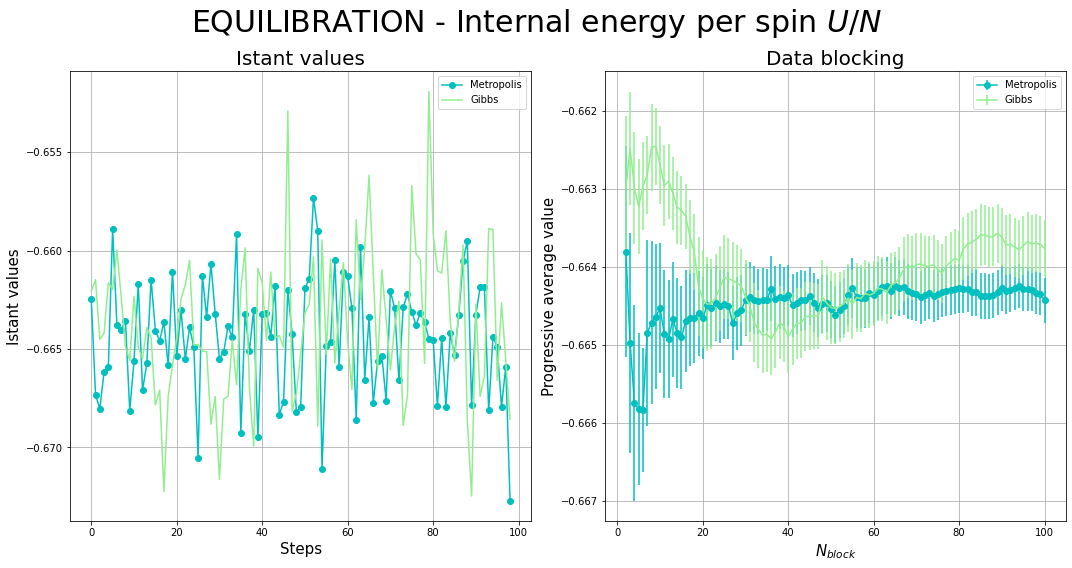

In [48]:
filename = np.array(["./Risultati/metro_ene_eq.dat",
                     "./Risultati/gibbs_ene_eq.dat"])

x = np.arange(99)

plt.figure(figsize=(15,8))
plt.suptitle('EQUILIBRATION - Internal energy per spin $U/N$',fontsize=30)
blkM, valueM, aveM, errM = np.loadtxt(filename[0], usecols=(0,1,2,3), unpack='true')
blkG, valueG, aveG, errG = np.loadtxt(filename[1], usecols=(0,1,2,3), unpack='true')

plt.subplot(1,2,1)
plt.title('Istant values',fontsize=20)
plt.plot(x,valueM[501:600],color='c',marker='o',label='Metropolis')
plt.plot(x,valueG[501:600],color='lightgreen',label='Gibbs')
plt.xlabel(r'Steps', fontsize=15)    
plt.ylabel(r'Istant values', fontsize=15)    
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Data blocking',fontsize=20)
plt.errorbar(blkM[501:600],aveM[501:600],yerr=errM[501:600],color='c',marker='o',label='Metropolis')
plt.errorbar(blkG[501:600],aveG[501:600],yerr=errG[501:600],color='lightgreen',label='Gibbs')
plt.xlabel(r'$N_{block}$', fontsize=15)
plt.ylabel(r'Progressive average value', fontsize=15)    
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

From this analysis we can draw some conclusions:

  1. It only takes a few hundred steps to equilibrate the system using both methods. We therefore insert in the code a <font face = "Courier"> `for` </font> loop in which we call the <font face = "Courier"> `Move(int)` </font> function 500 times before starting the measurements.
  2. As the temperature decreases, the acceptance rate of Metropolis' moves decreases. This happens because, at low temperatures, the system tends to align the spins and it becomes less energetically convenient to accept a move in which the orientation of a spin is reversed.

# <span style="color:red"> Measures </span>

We first calculate the theoretical values of the quantities we want to measure.

In [49]:
#-------------------------------------------------
##################### Internal energy per spin U/N
points=11
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
E = -J*( th + ch*thN )/( 1 + thN )
#-------------------------------------------------
##################### Heat capacity
H = ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
#-------------------------------------------------
##################### Magnetization

h=0.02 #external field
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
#-------------------------------------------------
##################### Magnetic susceptibility
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

We now run simulations of 100 blocks, each of 5000 steps, for 11 different temperatures in the range $\left[0.5;2.0\right]$. We compare Gibbs' method and Metropolis' method with the expected values. For each temperature we run a <font face = "Courier"> `for` </font> loop of 100 blocks. At the end of each loop we save the required measurements with the function <font face = "Courier"> `PrintFinals(double,int)` </font>.

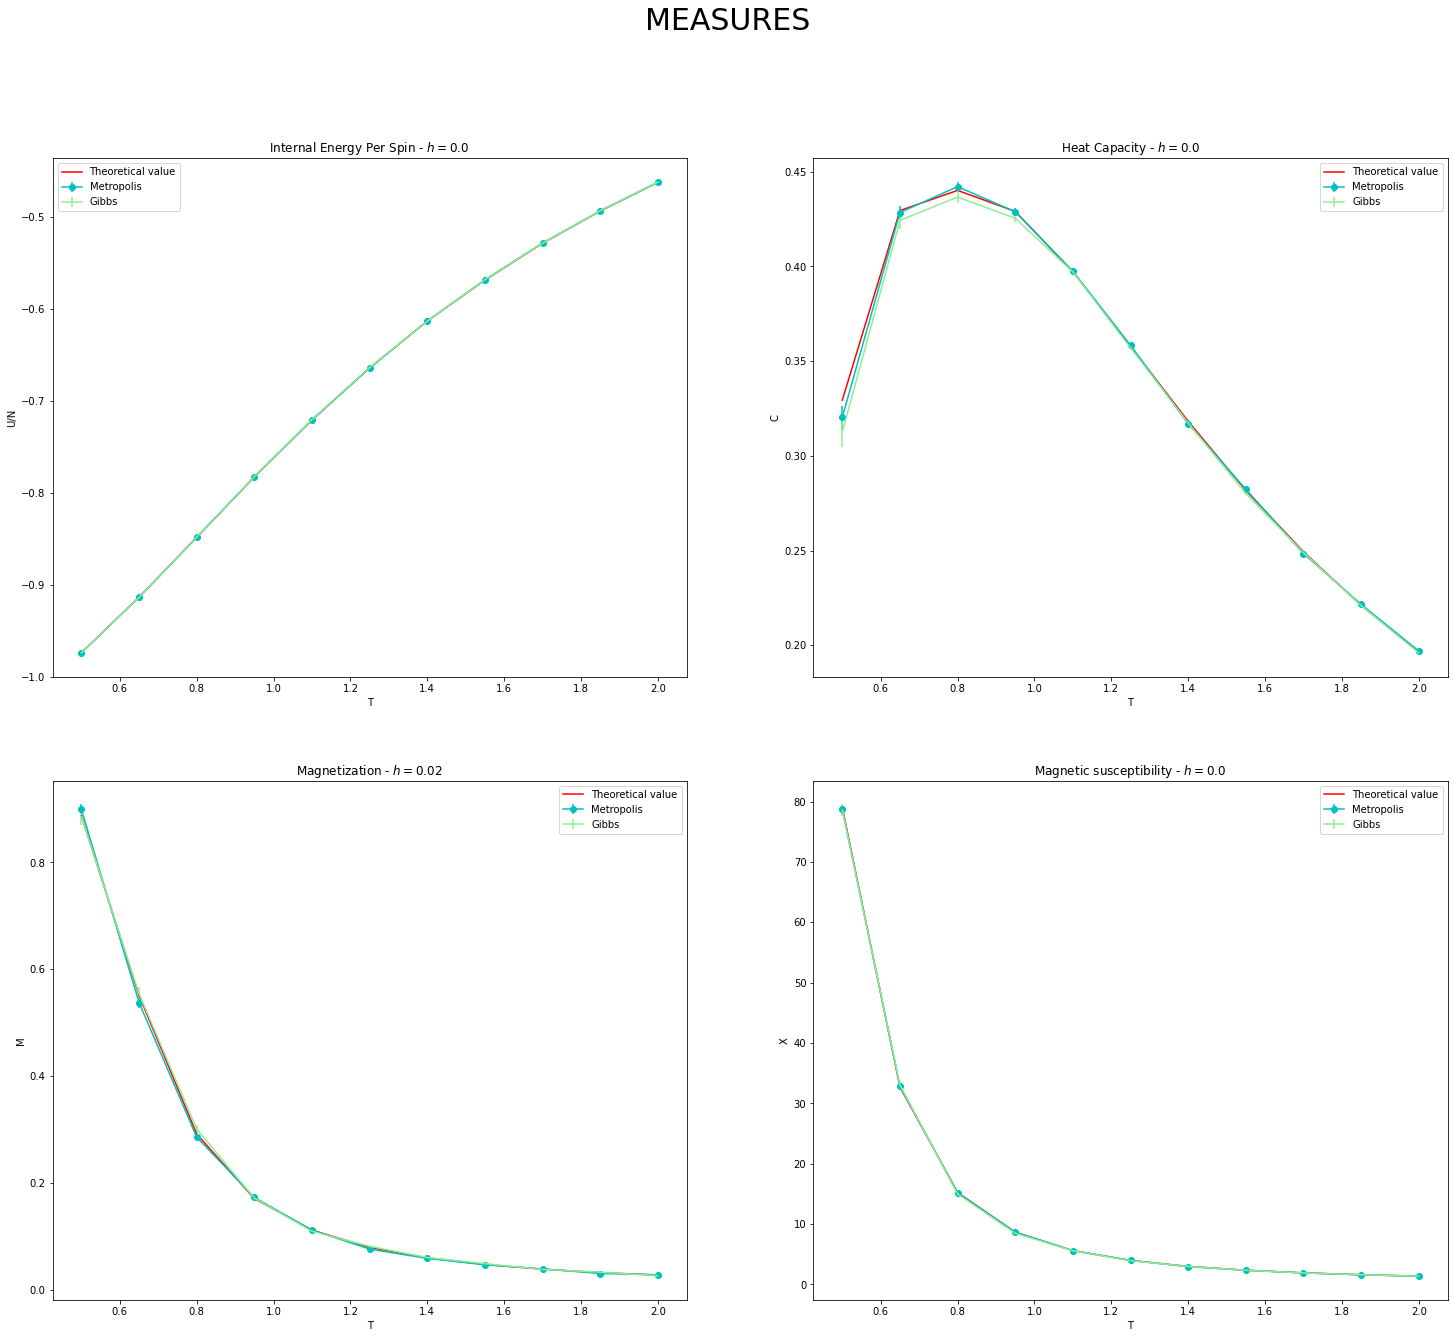

In [50]:
fileM = np.array(["./Risultati/E_metro_h0.dat",
                     "./Risultati/H_metro_h0.dat",
                     "./Risultati/M_metro_h002.dat",
                     "./Risultati/X_metro_h0.dat"])
fileG = np.array(["./Risultati/E_gibbs_h0.dat",
                     "./Risultati/H_gibbs_h0.dat",
                     "./Risultati/M_gibbs_h002.dat",
                     "./Risultati/X_gibbs_h0.dat"])
title = np.array(["Internal Energy Per Spin - $h = 0.0$",
                     "Heat Capacity - $h = 0.0$",
                     "Magnetization - $h = 0.02$",
                     "Magnetic susceptibility - $h = 0.0$"])

plt.figure(figsize=(25,21))
plt.suptitle('MEASURES',fontsize=30)

for i in range(4):
    tempM, aveM, errM = np.loadtxt(fileM[i], usecols=(0,1,2), unpack='true')
    tempG, aveG, errG = np.loadtxt(fileG[i], usecols=(0,1,2), unpack='true')
        
    plt.subplot(2,2,i+1)
    plt.errorbar(tempM,aveM,yerr=errM, color='c', marker='o',label='Metropolis')
    plt.errorbar(tempG,aveG,yerr=errG, color='lightgreen',label='Gibbs')
    if( i == 0 ):
        plt.plot(T,E,color='red',label='Theoretical value')
        plt.ylabel('U/N')
    elif( i == 1 ):
        plt.plot(T,H,color='red',label='Theoretical value')
        plt.ylabel('C')
    elif( i == 2 ):
        plt.plot(T,M,color='red',label='Theoretical value')
        plt.ylabel('M')
    elif( i == 3 ):
        plt.plot(T,X,color='red',label='Theoretical value')
        plt.ylabel('X')
    plt.title(title[i])
    plt.xlabel('T')
    plt.legend()

plt.show()

We observe compatibility between the two methods and the expected values, while noting that the calculated errors are very small.